# This notebook is for the Data Science Capstone Project (In order to run this notebook, Google Colab environment must be used.)

## 1. Introduction/Business Problem 

Many people working in the San Francisco Bay Area are employed at top technology companies. The commute to work is sometimes congested and people prefer to live closer to their work place to reduce commute time.

This study investigates the number of choices of apartments within a mile from the headquarters of Apple, Google and Intel.

## 2. Data

The data used in this study are dervied from data collected by using the Foursquare API.

## 3. Methodology

The methodology is to use Foursquare API to list the number of different apartmnet complexes located within one mile from Apple, Google and Intel headquarters in the San Francisco Bay Area. The number for each company can then be compared.

### a. Apple, Cupertino

In [45]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [46]:
CLIENT_ID = 'Q3MQR20QDUUIGD3TVLRWXJNLFB0BVPQLAEGF5QAOUFVYI0YB' # your Foursquare ID
CLIENT_SECRET = 'QUUUG4MCZJAXY1TKY2L4C4NMG4HLSI2TZAHBGXQJB4P3VTET' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Q3MQR20QDUUIGD3TVLRWXJNLFB0BVPQLAEGF5QAOUFVYI0YB
CLIENT_SECRET:QUUUG4MCZJAXY1TKY2L4C4NMG4HLSI2TZAHBGXQJB4P3VTET


In [92]:
address = 'One Apple Park Way, Cupertino, CA 95014'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.3337269 -122.0118369


In [93]:
search_query = 'Apartment'
radius = 1600
print(search_query + ' .... OK!')

Apartment .... OK!


In [94]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=Q3MQR20QDUUIGD3TVLRWXJNLFB0BVPQLAEGF5QAOUFVYI0YB&client_secret=QUUUG4MCZJAXY1TKY2L4C4NMG4HLSI2TZAHBGXQJB4P3VTET&ll=37.3337269,-122.0118369&v=20180604&query=Apartment&radius=1600&limit=30'

In [95]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e77e3d9c94979001b4b75e0'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
       'suffix': '.png'},
      'id': '4d954b06a243a5684965b473',
      'name': 'Residential Building (Apartment / Condo)',
      'pluralName': 'Residential Buildings (Apartments / Condos)',
      'primary': True,
      'shortName': 'Residential'}],
    'hasPerk': False,
    'id': '4f2c9a3ce4b006ef9849de3b',
    'location': {'address': '19500 Pruneridge Ave',
     'cc': 'US',
     'city': 'Cupertino',
     'country': 'United States',
     'distance': 180,
     'formattedAddress': ['19500 Pruneridge Ave',
      'Cupertino, CA 95014',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.332146585808,
       'lng': -122.01227087884487}],
     'lat': 37.332146585808,
     'lng': -122.01227087884487,
     'postalCode': '95014',
     'state': 'CA'},
    'name': 'The Hamptons

In [96]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet
0,4f2c9a3ce4b006ef9849de3b,The Hamptons at Cupertino,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584915437,False,19500 Pruneridge Ave,37.332147,-122.012271,"[{'label': 'display', 'lat': 37.332146585808, ...",180,95014,US,Cupertino,CA,United States,"[19500 Pruneridge Ave, Cupertino, CA 95014, Un...",60023603,NaN
1,4c96fb6894a0236ac490a312,Shadow Oaks Apartment Homes,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1584915437,False,202 Calvert Dr,37.322053,-121.999597,"[{'label': 'display', 'lat': 37.32205306, 'lng...",1691,95014,US,Cupertino,CA,United States,"[202 Calvert Dr, Cupertino, CA 95014, United S...",NaN,NaN
2,5e458273e714a90008753cdb,Shadow Oaks Apartment Homes,[],v-1584915437,False,202 Calvert Drive,37.321663,-121.999419,"[{'label': 'display', 'lat': 37.32166319999999...",1735,95014,US,Cupertino,CA,United States,"[202 Calvert Drive, Cupertino, CA 95014, Unite...",NaN,NaN
3,4b934a44f964a520c33e34e3,Arioso Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584915437,False,19800 pruneridge ave,37.334303,-122.016081,"[{'label': 'display', 'lat': 37.334303, 'lng':...",381,95014,US,Cupertino,CA,United States,"[19800 pruneridge ave, Cupertino, CA 95014, Un...",NaN,NaN
4,5c5634ddbed483002c402b28,Lehigh Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584915437,False,Lehigh Drive,37.335706,-121.994352,"[{'label': 'display', 'lat': 37.335706, 'lng':...",1563,95051,US,Santa Clara,CA,United States,"[Lehigh Drive, Santa Clara, CA 95051, United S...",NaN,NaN


In [97]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,The Hamptons at Cupertino,Residential Building (Apartment / Condo),19500 Pruneridge Ave,37.332147,-122.012271,"[{'label': 'display', 'lat': 37.332146585808, ...",180,95014,US,Cupertino,CA,United States,"[19500 Pruneridge Ave, Cupertino, CA 95014, Un...",NaN,4f2c9a3ce4b006ef9849de3b
1,Shadow Oaks Apartment Homes,Building,202 Calvert Dr,37.322053,-121.999597,"[{'label': 'display', 'lat': 37.32205306, 'lng...",1691,95014,US,Cupertino,CA,United States,"[202 Calvert Dr, Cupertino, CA 95014, United S...",NaN,4c96fb6894a0236ac490a312
2,Shadow Oaks Apartment Homes,None,202 Calvert Drive,37.321663,-121.999419,"[{'label': 'display', 'lat': 37.32166319999999...",1735,95014,US,Cupertino,CA,United States,"[202 Calvert Drive, Cupertino, CA 95014, Unite...",NaN,5e458273e714a90008753cdb
3,Arioso Apartments,Residential Building (Apartment / Condo),19800 pruneridge ave,37.334303,-122.016081,"[{'label': 'display', 'lat': 37.334303, 'lng':...",381,95014,US,Cupertino,CA,United States,"[19800 pruneridge ave, Cupertino, CA 95014, Un...",NaN,4b934a44f964a520c33e34e3
4,Lehigh Apartments,Residential Building (Apartment / Condo),Lehigh Drive,37.335706,-121.994352,"[{'label': 'display', 'lat': 37.335706, 'lng':...",1563,95051,US,Santa Clara,CA,United States,"[Lehigh Drive, Santa Clara, CA 95051, United S...",NaN,5c5634ddbed483002c402b28
5,City Gate at Cupertino Apartments,Building,5608 Stevens Creek Blvd.,37.322805,-122.003000,"[{'label': 'display', 'lat': 37.3228051, 'lng'...",1445,95014,US,Cupertino,CA,United States,"[5608 Stevens Creek Blvd., Cupertino, CA 95014...",NaN,4ee8a799991154b31c52ba3d
6,Nineteen800 Apartments,Building,19700 Vallco Pkwy,37.325330,-122.013232,"[{'label': 'display', 'lat': 37.3253301, 'lng'...",942,95014,US,Cupertino,CA,United States,"[19700 Vallco Pkwy, Cupertino, CA 95014, Unite...",NaN,5c1035d5121384002cbbebde
7,Verandas at Cupertino Apartments,Residential Building (Apartment / Condo),20200 Lucille Ave,37.332831,-122.024732,"[{'label': 'display', 'lat': 37.332831, 'lng':...",1145,95014,US,Cupertino,CA,United States,"[20200 Lucille Ave, Cupertino, CA 95014, Unite...",NaN,5d609c15f01ce40008b7d819
8,Aviare Apartments,Residential Building (Apartment / Condo),20415 Via Paviso,37.336659,-122.031467,"[{'label': 'display', 'lat': 37.3366590250376,...",1767,95014,US,Cupertino,CA,United States,"[20415 Via Paviso (off N De Anza Blvd), Cupert...",off N De Anza Blvd,4c11be42a9420f475b617d51
9,City Gate at Cupertino Apartments,Building,5608 Stevens Creek Blvd,37.322680,-122.001787,"[{'label': 'display', 'lat': 37.32268, 'lng': ...",1517,95014,US,Cupertino,CA,United States,"[5608 Stevens Creek Blvd, Cupertino, CA 95014,...",NaN,59d2616b6fd62664b13d0ae3


In [98]:
dataframe_filtered.name

0             The Hamptons at Cupertino
1           Shadow Oaks Apartment Homes
2           Shadow Oaks Apartment Homes
3                     Arioso Apartments
4                     Lehigh Apartments
5     City Gate at Cupertino Apartments
6                Nineteen800 Apartments
7      Verandas at Cupertino Apartments
8                     Aviare Apartments
9     City Gate at Cupertino Apartments
10            Harvard Studio Apartments
Name: name, dtype: object

In [0]:
df_apple = dataframe_filtered

In [100]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Center

# add a red circle marker to represent the Center
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Apple Park',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Coffee restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### b. Google, Mountain View

In [58]:
address = '1600 Amphitheatre Pkwy, Mountain View, CA 94043'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.42248575 -122.08558456613565


In [59]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=Q3MQR20QDUUIGD3TVLRWXJNLFB0BVPQLAEGF5QAOUFVYI0YB&client_secret=QUUUG4MCZJAXY1TKY2L4C4NMG4HLSI2TZAHBGXQJB4P3VTET&ll=37.42248575,-122.08558456613565&v=20180604&query=Apartment&radius=1600&limit=30'

In [60]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e77dbae77af03001bd3ece6'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
       'suffix': '.png'},
      'id': '4d954b06a243a5684965b473',
      'name': 'Residential Building (Apartment / Condo)',
      'pluralName': 'Residential Buildings (Apartments / Condos)',
      'primary': True,
      'shortName': 'Residential'}],
    'hasPerk': False,
    'id': '586ae4d607ac0762edd131f5',
    'location': {'address': '768 N Rengstorff Ave',
     'cc': 'US',
     'city': 'Mountain View',
     'country': 'United States',
     'distance': 1217,
     'formattedAddress': ['768 N Rengstorff Ave',
      'Mountain View, CA 94043',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.413328,
       'lng': -122.09310900000001}],
     'lat': 37.413328,
     'lng': -122.09310900000001,
     'postalCode': '94043',
     'state': 'CA'},
    'name': 'St Croix Apartm

In [61]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,586ae4d607ac0762edd131f5,St Croix Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584913282,False,768 N Rengstorff Ave,37.413328,-122.093109,"[{'label': 'display', 'lat': 37.413328, 'lng':...",1217,94043,US,Mountain View,CA,United States,"[768 N Rengstorff Ave, Mountain View, CA 94043...",NaN
1,4dbcbc561e72b351cabb719e,Alpine Meadows Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584913282,False,2035 W Middlefield Rd,37.411135,-122.091952,"[{'label': 'display', 'lat': 37.41113499999999...",1383,94043,US,Mountain View,CA,United States,"[2035 W Middlefield Rd, Mountain View, CA 9404...",NaN
2,552f2c0a498ec8363ebd5211,Somerset place apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584913282,False,2210 Rock St,37.413226,-122.094959,"[{'label': 'display', 'lat': 37.413226, 'lng':...",1322,94043,US,Mountain View,CA,United States,"[2210 Rock St, Mountain View, CA 94043, United...",NaN
3,5ceb14971acf11002c70a8a4,Palmero Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584913282,False,NaN,37.408002,-122.092958,"[{'label': 'display', 'lat': 37.408002, 'lng':...",1739,94043,US,Mountain View,CA,United States,"[Mountain View, CA 94043, United States]",NaN
4,4b9d556af964a52070a436e3,Woodview Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584913282,False,Rock Street,37.412180,-122.096096,"[{'label': 'display', 'lat': 37.41218, 'lng': ...",1476,NaN,US,Mountain View,CA,United States,"[Rock Street (at Rengstorff), Mountain View, C...",at Rengstorff


In [62]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,St Croix Apartments,Residential Building (Apartment / Condo),768 N Rengstorff Ave,37.413328,-122.093109,"[{'label': 'display', 'lat': 37.413328, 'lng':...",1217,94043,US,Mountain View,CA,United States,"[768 N Rengstorff Ave, Mountain View, CA 94043...",NaN,586ae4d607ac0762edd131f5
1,Alpine Meadows Apartments,Residential Building (Apartment / Condo),2035 W Middlefield Rd,37.411135,-122.091952,"[{'label': 'display', 'lat': 37.41113499999999...",1383,94043,US,Mountain View,CA,United States,"[2035 W Middlefield Rd, Mountain View, CA 9404...",NaN,4dbcbc561e72b351cabb719e
2,Somerset place apartments,Residential Building (Apartment / Condo),2210 Rock St,37.413226,-122.094959,"[{'label': 'display', 'lat': 37.413226, 'lng':...",1322,94043,US,Mountain View,CA,United States,"[2210 Rock St, Mountain View, CA 94043, United...",NaN,552f2c0a498ec8363ebd5211
3,Palmero Apartments,Residential Building (Apartment / Condo),NaN,37.408002,-122.092958,"[{'label': 'display', 'lat': 37.408002, 'lng':...",1739,94043,US,Mountain View,CA,United States,"[Mountain View, CA 94043, United States]",NaN,5ceb14971acf11002c70a8a4
4,Woodview Apartments,Residential Building (Apartment / Condo),Rock Street,37.412180,-122.096096,"[{'label': 'display', 'lat': 37.41218, 'lng': ...",1476,NaN,US,Mountain View,CA,United States,"[Rock Street (at Rengstorff), Mountain View, C...",at Rengstorff,4b9d556af964a52070a436e3
5,Palo Alto Gardens Apartments,Residential Building (Apartment / Condo),648 San Antonio Rd,37.413912,-122.103312,"[{'label': 'display', 'lat': 37.41391199999999...",1835,94306,US,Palo Alto,CA,United States,"[648 San Antonio Rd (at Middlefield Rd), Palo ...",at Middlefield Rd,4d9e83799bf0a35dc024fd0a
6,Meadowoods Apartments,Residential Building (Apartment / Condo),1555 W Middlefield Rd,37.408105,-122.083125,"[{'label': 'display', 'lat': 37.408105, 'lng':...",1615,94043,US,Mountain View,CA,United States,"[1555 W Middlefield Rd, Mountain View, CA 9404...",NaN,54f92093498e29387a372bce


In [63]:
dataframe_filtered.name

0             St Croix Apartments
1       Alpine Meadows Apartments
2       Somerset place apartments
3              Palmero Apartments
4             Woodview Apartments
5    Palo Alto Gardens Apartments
6           Meadowoods Apartments
Name: name, dtype: object

In [0]:
df_google = dataframe_filtered

In [65]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Center

# add a red circle marker to represent the Center
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Googleplex',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Coffee restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### c. Intel Corporation, Santa Clara

In [71]:
address = '2200 Mission College Blvd, Santa Clara, CA 95054'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.3882663 -121.9637798


In [72]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=Q3MQR20QDUUIGD3TVLRWXJNLFB0BVPQLAEGF5QAOUFVYI0YB&client_secret=QUUUG4MCZJAXY1TKY2L4C4NMG4HLSI2TZAHBGXQJB4P3VTET&ll=37.3882663,-121.9637798&v=20180604&query=Apartment&radius=1600&limit=30'

In [73]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e77df1c6001fe001c7be23d'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/apartment_',
       'suffix': '.png'},
      'id': '4d954b06a243a5684965b473',
      'name': 'Residential Building (Apartment / Condo)',
      'pluralName': 'Residential Buildings (Apartments / Condos)',
      'primary': True,
      'shortName': 'Residential'}],
    'hasPerk': False,
    'id': '5aaa8a9f9b04730eee6df2b5',
    'location': {'address': '3320 Montgomery Dr',
     'cc': 'US',
     'city': 'Santa Clara',
     'country': 'United States',
     'distance': 1125,
     'formattedAddress': ['3320 Montgomery Dr',
      'Santa Clara, CA 95054',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.3815558,
       'lng': -121.9732975}],
     'lat': 37.3815558,
     'lng': -121.9732975,
     'postalCode': '95054',
     'state': 'CA'},
    'name': 'Santa Clara Square Apartment Homes'

In [74]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,5aaa8a9f9b04730eee6df2b5,Santa Clara Square Apartment Homes,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584914203,False,3320 Montgomery Dr,37.381556,-121.973298,"[{'label': 'display', 'lat': 37.3815558, 'lng'...",1125,95054,US,Santa Clara,CA,United States,"[3320 Montgomery Dr, Santa Clara, CA 95054, Un...",NaN
1,4e34a639483bf3839a26e8e0,Estancia at Santa Clara Apartments,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1584914203,False,1650 Hope Dr.,37.398350,-121.955860,"[{'label': 'display', 'lat': 37.39835, 'lng': ...",1323,95054,US,Santa Clara,CA,United States,"[1650 Hope Dr. (btwn Lafayette and Lick Mill),...",btwn Lafayette and Lick Mill
2,4c536f561b46c9b6ca13edcc,Bellavista Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584914203,False,1500 Vista Club Cir,37.401030,-121.954773,"[{'label': 'display', 'lat': 37.40102985963084...",1628,95054,US,Santa Clara,CA,United States,"[1500 Vista Club Cir, Santa Clara, CA 95054, U...",NaN
3,575e14ea498e09d3e59e977f,Bassett Davis Apartments,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584914203,False,4440 Bassett St,37.396622,-121.960913,"[{'label': 'display', 'lat': 37.396622, 'lng':...",964,95054,US,Santa Clara,CA,United States,"[4440 Bassett St, Santa Clara, CA 95054, Unite...",NaN
4,4c9abcbca004a1cd09384b6e,Bella Vista Apartments 1518,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1584914203,False,1518 Vista Club Cir,37.401577,-121.955268,"[{'label': 'display', 'lat': 37.40157744889557...",1662,95054,US,Santa Clara,CA,United States,"[1518 Vista Club Cir, Santa Clara, CA 95054, U...",NaN


In [75]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Santa Clara Square Apartment Homes,Residential Building (Apartment / Condo),3320 Montgomery Dr,37.381556,-121.973298,"[{'label': 'display', 'lat': 37.3815558, 'lng'...",1125,95054,US,Santa Clara,CA,United States,"[3320 Montgomery Dr, Santa Clara, CA 95054, Un...",NaN,5aaa8a9f9b04730eee6df2b5
1,Estancia at Santa Clara Apartments,Building,1650 Hope Dr.,37.398350,-121.955860,"[{'label': 'display', 'lat': 37.39835, 'lng': ...",1323,95054,US,Santa Clara,CA,United States,"[1650 Hope Dr. (btwn Lafayette and Lick Mill),...",btwn Lafayette and Lick Mill,4e34a639483bf3839a26e8e0
2,Bellavista Apartments,Residential Building (Apartment / Condo),1500 Vista Club Cir,37.401030,-121.954773,"[{'label': 'display', 'lat': 37.40102985963084...",1628,95054,US,Santa Clara,CA,United States,"[1500 Vista Club Cir, Santa Clara, CA 95054, U...",NaN,4c536f561b46c9b6ca13edcc
3,Bassett Davis Apartments,Residential Building (Apartment / Condo),4440 Bassett St,37.396622,-121.960913,"[{'label': 'display', 'lat': 37.396622, 'lng':...",964,95054,US,Santa Clara,CA,United States,"[4440 Bassett St, Santa Clara, CA 95054, Unite...",NaN,575e14ea498e09d3e59e977f
4,Bella Vista Apartments 1518,Residential Building (Apartment / Condo),1518 Vista Club Cir,37.401577,-121.955268,"[{'label': 'display', 'lat': 37.40157744889557...",1662,95054,US,Santa Clara,CA,United States,"[1518 Vista Club Cir, Santa Clara, CA 95054, U...",NaN,4c9abcbca004a1cd09384b6e
5,Rivertown Apartments,Residential Building (Apartment / Condo),NaN,37.400488,-121.954852,"[{'label': 'display', 'lat': 37.40048834393895...",1573,95054,US,Santa Clara,CA,United States,"[Santa Clara, CA 95054, United States]",NaN,4cd01f2d6200b1f7dd4ad228
6,Nantucket Apartments,Residential Building (Apartment / Condo),1600 Nantucket Cir,37.404279,-121.957984,"[{'label': 'display', 'lat': 37.40427945846252...",1854,95054,US,Santa Clara,CA,United States,"[1600 Nantucket Cir, Santa Clara, CA 95054, Un...",NaN,4b67708df964a520094f2be3


In [76]:
dataframe_filtered.name

0    Santa Clara Square Apartment Homes
1    Estancia at Santa Clara Apartments
2                 Bellavista Apartments
3              Bassett Davis Apartments
4           Bella Vista Apartments 1518
5                  Rivertown Apartments
6                  Nantucket Apartments
Name: name, dtype: object

In [0]:
df_intel = dataframe_filtered

In [78]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Center

# add a red circle marker to represent the Center
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Intel HQ',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Coffee restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## 4. Results

In [57]:
df_apple.name

0             The Hamptons at Cupertino
1           Shadow Oaks Apartment Homes
2           Shadow Oaks Apartment Homes
3                     Arioso Apartments
4                     Lehigh Apartments
5     City Gate at Cupertino Apartments
6                Nineteen800 Apartments
7      Verandas at Cupertino Apartments
8                     Aviare Apartments
9     City Gate at Cupertino Apartments
10            Harvard Studio Apartments
Name: name, dtype: object

In [68]:
df_google.name

0             St Croix Apartments
1       Alpine Meadows Apartments
2       Somerset place apartments
3              Palmero Apartments
4             Woodview Apartments
5    Palo Alto Gardens Apartments
6           Meadowoods Apartments
Name: name, dtype: object

In [101]:
df_intel.name

0    Santa Clara Square Apartment Homes
1    Estancia at Santa Clara Apartments
2                 Bellavista Apartments
3              Bassett Davis Apartments
4           Bella Vista Apartments 1518
5                  Rivertown Apartments
6                  Nantucket Apartments
Name: name, dtype: object

In [105]:
column_names = ["Apple", "Google", "Intel"]

df_comp = pd.DataFrame([[df_apple.name.size, df_google.name.size, df_intel.name.size]], columns=column_names)

df_comp

,Apple,Google,Intel
0,11,7,7


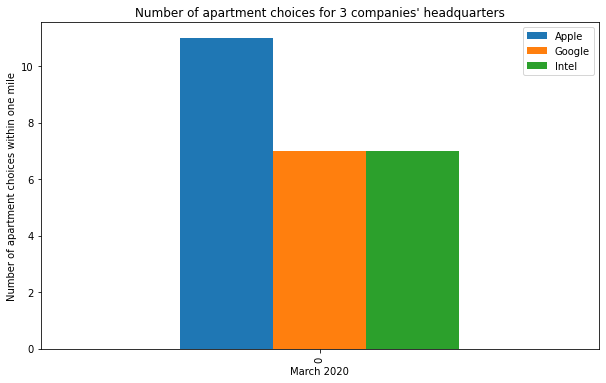

In [111]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_comp.plot(kind='bar', figsize=(10, 6))

plt.xlabel('March 2020') # add to x-label to the plot
plt.ylabel('Number of apartment choices within one mile') # add y-label to the plot
plt.title('Number of apartment choices for 3 companies\' headquarters') # add title to the plot

plt.show()

## 5. Discussion

This study did not take into account on whether or not the 1-mile distance from the headquarters to the apartments are easily walkable or not. In some cases, the headquaerters and the apartments are spearated by freeways which the pedestrians may not want to walk across.

## 6. Conclusion

This study shows that the number of apartment choices nearby Apple headqurater is the highest among the different companies' headquarters chosen in this study in the San Fransisco Bay Area.